## Libraries importation

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import cv2
import os
from paddleocr import PaddleOCR, draw_ocr
import glob

## Test OCR on a single image

In [42]:
# setup the model
ocr_model = PaddleOCR(lang='en', use_angle_cls=True, show_log=False)



FA39863


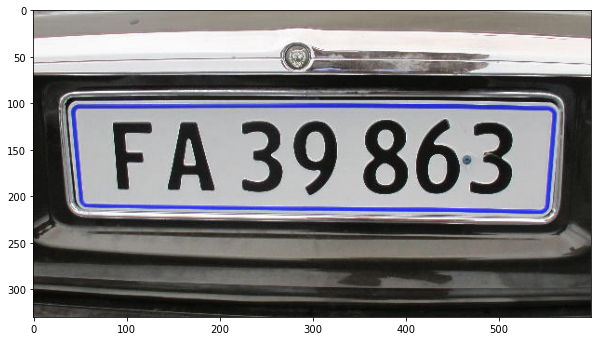

In [57]:
# Try the detection on a single image
img_path = "plate_images/plate_5.jpg"
image = cv2.imread(img_path)

# Run the OCR method on the ocr model
result = ocr_model.ocr(image)
print("\n")
for res in result:
    print(res[1][0])

    
    
#image = cv2.imread(img_path)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

plate_images\plate_1.jpg


AGR0207


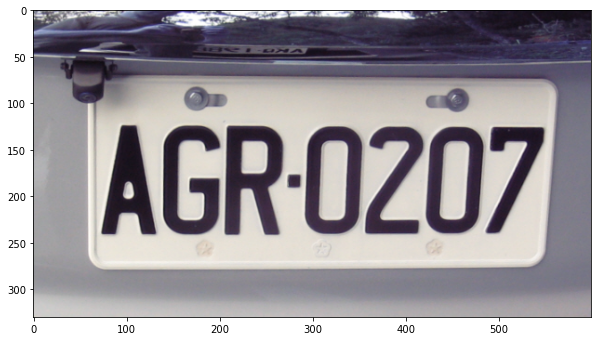

plate_images\plate_2.jpg


RAM8I59


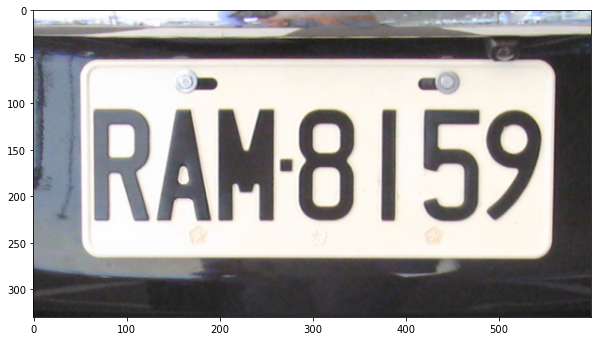

plate_images\plate_3.jpg


KA3199


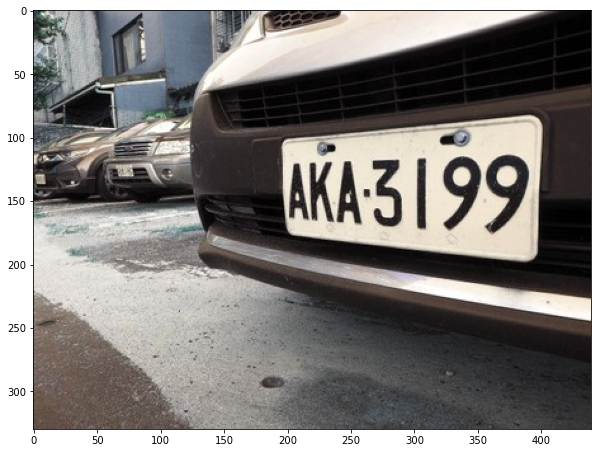

plate_images\plate_4.jpg


MAZ328


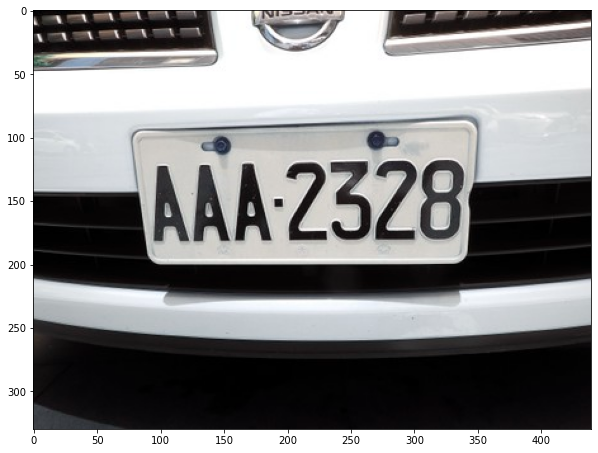

plate_images\plate_5.jpg


FA39863


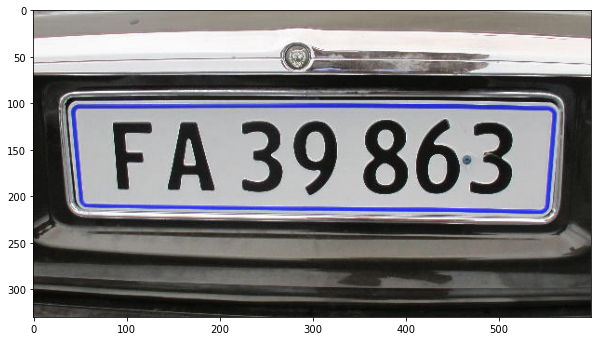

plate_images\plate_6.jpg


RAM8I59


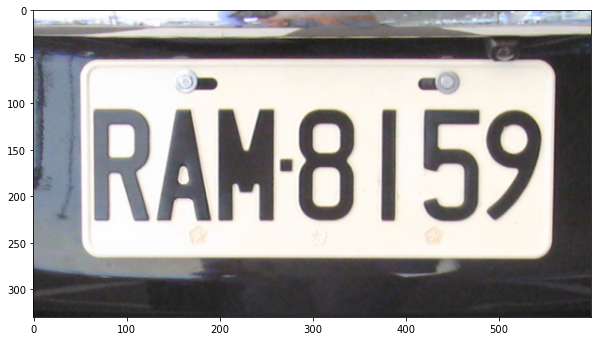

In [48]:
plate_list = []
for i in glob.glob("plate_images\\*"):
    print(i)
    image = cv2.imread(i)

    # Run the OCR method on the ocr model
    result = ocr_model.ocr(image)
    print("\n")
    for res in result:
        print(res[1][0])
        plate_list.append(res[1][0])

    #image = cv2.imread(img_path)
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()

In [18]:
plate_list

['AGR0207', 'RAM8I59', 'KA3199', 'MAZ328', 'FA39863', 'RAM8I59']

In [6]:
# Connect to the datbase
conn = sqlite3.connect('test.db')
print("--Opened database successfully--")

# Creating a cursor object using the cursor method
cursor = conn.cursor()

# Create table
conn.execute('''CREATE TABLE PLATE_DATABASE
            (PLATE_ID CHAR(50) PRIMARY KEY NOT NULL,
            FIRST_NAME TEXT NOT NULL,
            LAST_NAME TEXT NOT NULL,
            TEL_NUMB INT NOT NULL);''')
print("--Table Successfully Created.--")

--Opened database successfully--
--Table Successfully Created.--


In [7]:
# Insert data into our table
conn.execute("INSERT INTO PLATE_DATABASE (PLATE_ID, FIRST_NAME, LAST_NAME,TEL_NUMB) \
            VALUES ('AGR0207', 'Paul', 'Howard', 123456)");

conn.execute("INSERT INTO PLATE_DATABASE (PLATE_ID, FIRST_NAME, LAST_NAME,TEL_NUMB) \
            VALUES ('RAM8I59', 'Peter', 'James', 123987456)");

conn.execute("INSERT INTO PLATE_DATABASE (PLATE_ID, FIRST_NAME, LAST_NAME,TEL_NUMB) \
            VALUES ('KA3199', 'Fabrice', 'Martin', 12314678456)");

conn.execute("INSERT INTO PLATE_DATABASE (PLATE_ID, FIRST_NAME, LAST_NAME,TEL_NUMB) \
            VALUES ('MAZ328', 'Jessica', 'Spenser', 1234443456)");

conn.execute("INSERT INTO PLATE_DATABASE (PLATE_ID, FIRST_NAME, LAST_NAME,TEL_NUMB) \
            VALUES ('FA39863', 'Martha', 'Romez', 1338906)");

print("--Records Successfully Created.--")

--Records Successfully Created.--


# FINAL MODEL

9155UZ is an Unknown Plate ID, Please register it to the database first.


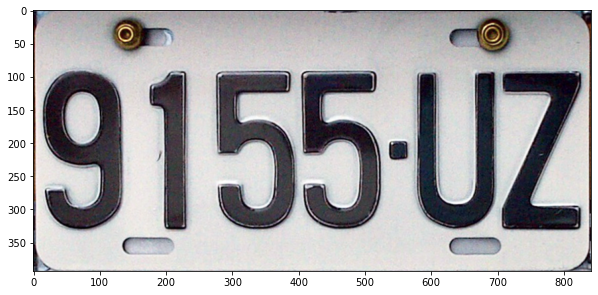

In [63]:
def check_database(plate_image):
    img_path = plate_image
    image = cv2.imread(img_path)

    # Run the OCR method on the ocr model
    result = ocr_model.ocr(image)
    retrieve_plate_id = result[0][1][0]

    cursor.execute("SELECT * from PLATE_DATABASE WHERE PLATE_ID==?", (retrieve_plate_id, ))
    query_output = cursor.fetchall()
    if len(query_output)>0:
        for item in query_output:
            print(f"Plate ID = {item[0]}\nFirst Name = {item[1]}\nLast Name = {item[2]}\nTel Number = {item[3]}\n")
    else:
        print(f"{retrieve_plate_id} is an Unknown Plate ID, Please register it to the database first.")
        
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()
        
check_database('plate_images/plate_9.jpg')